In [55]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from statistics import median
from statistics import mean
from statistics import harmonic_mean
from statistics import geometric_mean
import cv2
from math import e
from numpy import pi
from math import sin
from math import cos
from math import radians
from math import exp
from math import sqrt

In [56]:
import sys
eps = sys.float_info.epsilon

In [57]:
loc1 = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW4/inputs/4-1.png'
image1 = np.array(Image.open(loc1).convert('L'))

# a

In [58]:
def rescale_NN(image, scale_x = 2, scale_y = 2):
    rescaled = np.zeros(tuple(np.array(image.shape) * [scale_x,scale_y]))
    a,b = rescaled.shape
    for i in range(a):
        for j in range(b):
            rescaled[i,j] = image[int(i/scale_x),int(j/scale_y)]
    return rescaled

In [59]:
rescale_img1 = rescale_NN(image1)

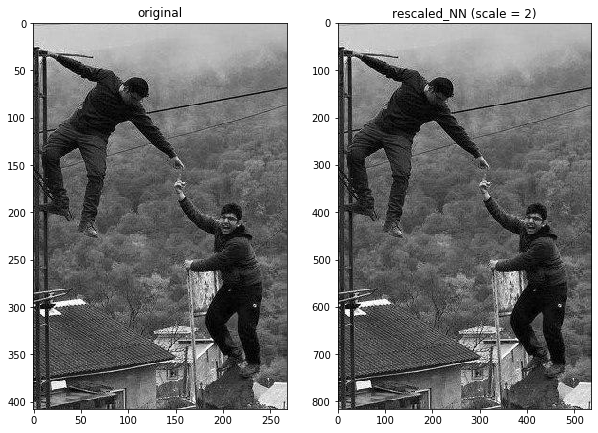

In [60]:
plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(image1,'gray',vmin = 0, vmax = 255)
plt.title('original')
# plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(rescale_img1,'gray',vmin = 0, vmax = 255)
plt.title('rescaled_NN (scale = 2)')
# plt.axis('off')
plt.show()

# b

In [61]:
import math

def bilinear_resize(image, height, width):
  """
  `image` is a 2-D numpy array
  `height` and `width` are the desired spatial dimension of the new 2-D array.
  """
  img_height, img_width = image.shape[:2]

  resized = np.empty([height, width])

  x_ratio = float(img_width - 1) / (width - 1) if width > 1 else 0
  y_ratio = float(img_height - 1) / (height - 1) if height > 1 else 0

  for i in range(height):
    for j in range(width):

      x_l, y_l = math.floor(x_ratio * j), math.floor(y_ratio * i)
      x_h, y_h = math.ceil(x_ratio * j), math.ceil(y_ratio * i)

      x_weight = (x_ratio * j) - x_l
      y_weight = (y_ratio * i) - y_l

      a = image[y_l, x_l]
      b = image[y_l, x_h]
      c = image[y_h, x_l]
      d = image[y_h, x_h]

      pixel = a * (1 - x_weight) * (1 - y_weight) \
              + b * x_weight * (1 - y_weight) + \
              c * y_weight * (1 - x_weight) + \
              d * x_weight * y_weight

      resized[i][j] = pixel

  return resized

In [62]:
bilinear_img1 = bilinear_resize(image1, image1.shape[0]*2, image1.shape[1]*2)

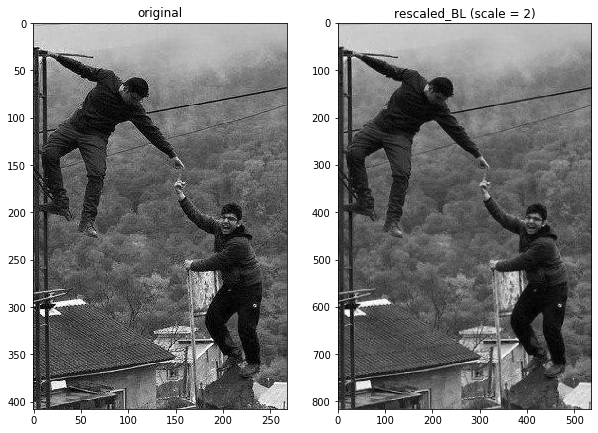

In [63]:
plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(image1,'gray',vmin = 0, vmax = 255)
plt.title('original')
# plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(bilinear_img1,'gray',vmin = 0, vmax = 255)
plt.title('rescaled_BL (scale = 2)')
# plt.axis('off')
plt.show()